In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import datetime 
import sklearn

%matplotlib inline

# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit
 
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# show several prints in one cell. This will allow us to condence every trick in one cell.
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score



In [2]:
df = pd.read_csv('preply_final_final.csv',sep=',')
df.drop('Unnamed: 0', inplace=True,axis=1)
df

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,60,264,5.0,0,0,0,0,10,19,7,...,0,0,0,0,0,0,1,4,1.0,0
1,110,1724,5.0,0,0,0,1,25,28,7,...,0,0,0,0,0,0,1,1,1.0,1
2,126,663,5.0,1,0,1,0,19,32,7,...,0,0,0,0,0,0,1,5,7.0,1
3,28,3,0.0,1,1,1,0,0,5,7,...,0,0,2,0,0,0,1,2,24.0,0
4,28,2,0.0,3,1,1,0,0,9,7,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4013,47,2,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4014,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4015,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0


In [3]:
df.lessons.unique()

array([ 264, 1724,  663, ...,  388,  956,  676], dtype=int64)

# Research question: Is it possible to predict the number of students of the teacher?

First of all we will check the correlation between variables 

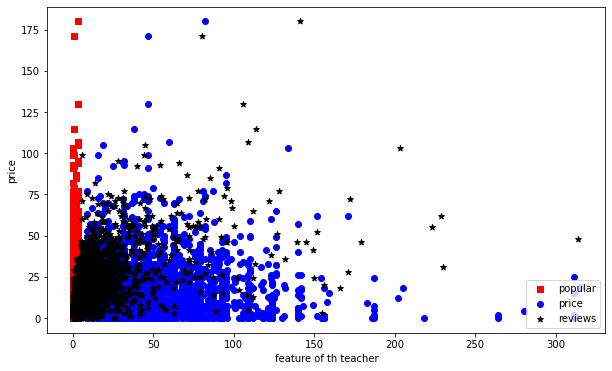

In [5]:
plt.scatter(x=df['popular'],y=df['students_count'],c='r',marker='s',label='popular')
plt.scatter(x=df['price'],y=df['students_count'],c='b',marker='o',label='price')
plt.scatter(x=df['reviews'],y=df['students_count'],c='k',marker='*',label='reviews')

plt.legend(numpoints=1,loc=4)
plt.xlabel('feature of th teacher')
plt.ylabel('price')
plt.show()

## Here we add the "countSpeakLanguage" column which tell us how many languages the teacher knows.
## we did it because of the same reason we did it on the first question- get a better picture of the correlation between the columns.

In [5]:
df.insert(24, 'countSpeakLanguage',0)
for i in range (0,4017):
    count=0
    if(df.English[i] > 0):
        count=count+1
    if(df.Spanish[i] > 0):
        count=count+1   
    if(df.Arabic[i] > 0):
        count=count+1
    if(df.Italian[i] > 0):
        count=count+1
    if(df.Russian[i] > 0):
        count=count+1
    if(df.Turkish[i] > 0):
        count=count+1
    if(df.Portuguese[i] > 0):
        count=count+1   
    if(df.German[i] > 0):
        count=count+1
    if(df.Danish[i] > 0):
        count=count+1
    if(df.Hebrew[i] > 0):
        count=count+1
    if(df.French[i] > 0):
        count=count+1
    
    df.countSpeakLanguage[i]=count

<ipython-input-5-7c35ae10ed3c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.countSpeakLanguage[i]=count


In [6]:
df.drop(['newly_joined','Spanish','Arabic','Italian','Russian','Turkish','Portuguese','German','Danish','Hebrew','French'],axis=1,inplace=True)

df

,price,lessons,rating,popular,has_diploma,approved_matirials,reviews,students_count,English,teaches_count,last_booked,response_time,is_expensive,countSpeakLanguage
0,60,264,5.0,0,0,0,10,19,7,1,4,1.0,0,1
1,110,1724,5.0,0,0,1,25,28,7,1,1,1.0,1,1
2,126,663,5.0,1,1,0,19,32,7,1,5,7.0,1,1
3,28,3,0.0,1,1,0,0,5,7,1,2,24.0,0,2
4,28,2,0.0,3,1,0,0,9,7,1,15,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,0,0,0,0,0,7,1,0,1.0,0,1
4013,47,2,0.0,0,0,0,0,0,7,1,0,1.0,0,1
4014,28,0,0.0,0,0,0,0,0,7,1,0,1.0,0,1
4015,28,0,0.0,0,0,0,0,0,7,1,0,1.0,0,1


In [7]:
df.to_csv('preply_newForq3.csv',sep=',')

# General information about the lessons column.

In [8]:
df.lessons.describe()

count     4017.000000
mean       529.424197
std       1127.247924
min          0.000000
25%         10.000000
50%        116.000000
75%        529.000000
max      16307.000000
Name: lessons, dtype: float64

## here we tried to do manipulation on the columns and we check if this helps the algorithm read better our data and if it cause an improvement on the result

In [9]:
df.insert(13, 'lessons/reviews',0)
for i in range (0,4017):
    if(df.lessons[i]!=0):
        df['lessons/reviews'][i]=df.reviews[i] / df.lessons[i] 
    else:
        df['lessons/reviews'][i]=df.reviews[i] / 529
    

<ipython-input-9-1a9bf56185bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lessons/reviews'][i]=df.reviews[i] / df.lessons[i]
<ipython-input-9-1a9bf56185bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lessons/reviews'][i]=df.reviews[i] / 529


## we classify the "lessons" column to get clear lines between the different amounts of students that belongs to different teachers.

In [10]:
for i in range(0,4017):
    if(df.lessons[i] >=0 and df.lessons[i] <=200):
        df.lessons[i]=1
        
    if(df.lessons[i] >=201 and df.lessons[i] <=400):
        df.lessons[i]=2
        
    if(df.lessons[i] >=401 and df.lessons[i] <=600):
        df.lessons[i]=3
        
    if(df.lessons[i] >=601 and df.lessons[i] <=800):
        df.lessons[i]=4
        
    if(df.lessons[i] >=801 and df.lessons[i] <=1000):
        df.lessons[i]=5
        
    if(df.lessons[i] >=1001 and df.lessons[i] <=1200):
        df.lessons[i]=6
        
    if(df.lessons[i] >=1201 and df.lessons[i] <=1400):
        df.lessons[i]=7
        
    if(df.lessons[i] >=1401 and df.lessons[i] <=1600):
        df.lessons[i]=8
        
    if(df.lessons[i] > 1600):
        df.lessons[i]=9


    

<ipython-input-10-ddcd23586d93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lessons[i]=2
<ipython-input-10-ddcd23586d93>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lessons[i]=9
<ipython-input-10-ddcd23586d93>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lessons[i]=4
<ipython-input-10-ddcd23586d93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

## the "lesson" column is a continuous variable. therefore we will use one of the regressions problems algorithms.

# Linear Regression
## model that assumes a linear relationship between the input variables (x) and the single output variable (y).
## "y" can be calculated from a linear combination of the input variables (x).
## minimize the residual sum of the squares between the targets observed in the data set, and the targets predicted by the linear approximation.


In [11]:
y = df['students_count']
X = df.drop('students_count', 1)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:

def describe_output_for_model(model, X_test, y_test, model_type):
    print("Predicting...")
    print("\tdisplaying information re: the '%s' model ...\n" %( model_type))
    y_pred = model.predict(X_test)
    if model_type == "classification":
        print("Model Accuracy: ", model.score(X_test, y_test))
        conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
        print(conf_mat)
        
        print("\nClassification Report: \n")
        print(classification_report(y_true=y_test, y_pred=y_pred))
    else:
        print("RMAE: ", mean_absolute_error(y_true=y_test, y_pred=y_pred))
        print("R^2 : ", r2_score(y_test, y_pred))
    
        
        
    # Coefficients
    if model_type == "classification":
        coef = list(sorted(zip(np.arange(X_test.shape[1]), abs(model.coef_[0])),key=lambda x: x[1]))
        coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
        print('\nCoefficient for every feature:\n')
        print(coef_table)
    else:
        coef = list(sorted(zip(np.arange(X_test.shape[1]), abs(model.coef_)),key=lambda x: x[1]))
        coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
        print('\nCoefficient for every feature:\n')
        print(coef_table)

describe_output_for_model(model, X_test, y_test, "regression")

Predicting...
	displaying information re: the 'regression' model ...

RMAE:  5.319475302812635
R^2 :  0.6636673928487418

Coefficient for every feature:

    Attributes  Coefficient
0          0.0     0.003622
1         13.0     0.043626
2         10.0     0.112332
3          6.0     0.163966
4          5.0     0.463595
5          4.0     0.592978
6          2.0     0.727771
7          8.0     1.121910
8          9.0     1.219671
9          7.0     2.027677
10         1.0     2.470540
11        12.0     2.881929
12         3.0     3.050409
13        11.0     3.242829


# explanation of the results and meaning of the criteria:

### RMAE (Root Mean Square Error)- 5.319475302812635
### R-squared is a goodness-of-fit measure for linear regression models. the algorithm succced to predict at a rate of 0.6636673928487418 (the closer to 1- the better the prediction was)

